# CAP 4630 - Intro to AI
## Project 2 - Summer 2022
## Flower classification using machine learning techniques
This is a simple example of a 3-class classifier using the Fisher's Iris dataset.


**Team members’ names:** Carlos Sanchez

**Date:** July 2022

**Course name:** CAP4630

**Assignment number:** P2

Useful references and sources:

- https://en.wikipedia.org/wiki/Iris_flower_data_set
- https://www.kaggle.com/uciml/iris
- http://archive.ics.uci.edu/ml/datasets/Iris/
- https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html
- https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html
- https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html
- https://scikit-learn.org/stable/tutorial/basic/tutorial.html

### TODO 1/ Sources
https://www.w3resource.com/machine-learning/scikit-learn/iris

https://www.mattiagiuri.com/2020/11/10/a-tree-for-the-iris-dataset/

https://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/auto_examples/tutorial/plot_svm_iris.html

https://www.enjoyalgorithms.com/blog/naive-bayes-in-ml



## Setup

We provide the initial setup of the notebook. In this section we import the necessary libraries so you can build your model.

In [ ]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

from joblib import dump, load

## Part 1. Load the data

The first step is to load the necessary data.

Use the command `read_csv` from pandas library to load the Iris dataset. After loading the data into a dataframe, show the top of the dataset.

The dataset file URL is https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data.

In [ ]:
# load the data
cols = [ 'sepal_length', ' sepal_width', 'petal_length', 'petal_width', 'class']
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', names=cols)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Part 2. Explore and visualize the data



After loading the dataset into a dataframe in memory, the next step is to perform an exploratory data analysis. The objective of the EDA is to discover as much information as possible about the dataset.

The `describe()` method is a good starting point. The `describe()` method prints statistics of the dataset, like mean, standard deviation, etc.

In [ ]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


A very important tool in exploratory data analysis is data visualization, which helps us to gain insights about the dataset.

### TODO 2

Write code to generate a pair plot for the Iris dataset.

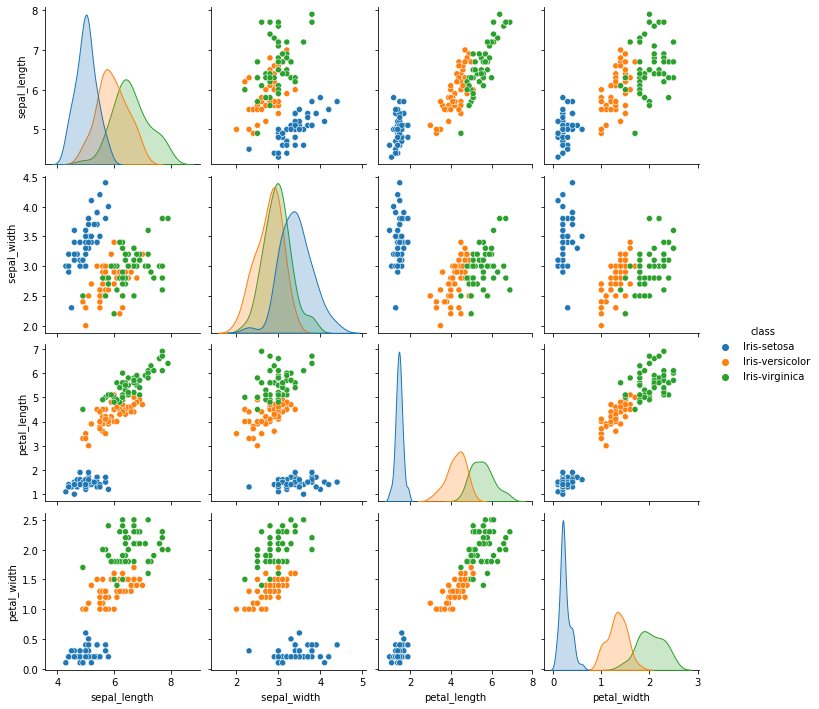

In [ ]:
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', names=cols)
sns.pairplot(iris,hue='class')


Write a code to generate a correlation matrix and display using heat map

The .corr() will give the correlation between the variables and seaborn heatmap will provide the figure displaying the correlation between variables.

              sepal_length   sepal_width  petal_length  petal_width
sepal_length      1.000000     -0.109369      0.871754     0.817954
 sepal_width     -0.109369      1.000000     -0.420516    -0.356544
petal_length      0.871754     -0.420516      1.000000     0.962757
petal_width       0.817954     -0.356544      0.962757     1.000000


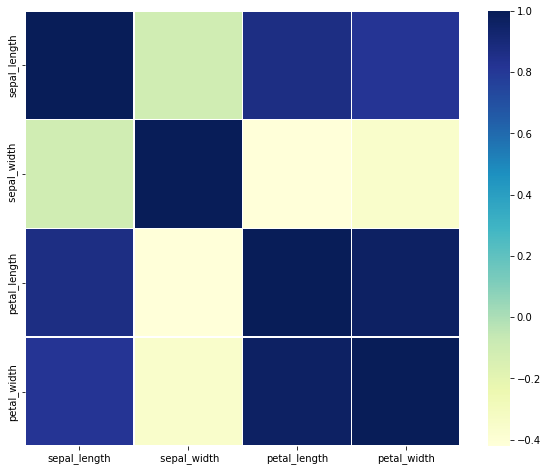

In [ ]:
# ENTER YOUR CODE HERE
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', names=cols)
X = iris.iloc[:, 0:4]
f, ax = plt.subplots(figsize=(10, 8))
corr = X.corr()
print(corr)
sns.heatmap(corr, mask=np.zeros_like(corr), cmap="YlGnBu",square=True, ax=ax, linewidths=.5)
plt.show()



I was able to match the guidelines picture, including the color and data.

## Part 3. Preprocess the data

Frequently, the dataset collected from databases, files or scraping the internet is not ready
to be consumed by a machine learning algorithm.

In most cases, the dataset needs some kind of preparation or preprocessing before being used as input to a machine learning algorithm.

In this case, we convert the string values of the class column to integer numbers because the algorithm we are going to use does not process string values.

In [ ]:
iris['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
iris['class_encod'] = iris['class'].apply(lambda x: 0 if x == 'Iris-setosa' else 1 if x == 'Iris-versicolor' else 2)
iris['class_encod'].unique()

array([0, 1, 2])

In [ ]:
y = iris[['class_encod']] # target attributes
x = iris.iloc[:, 0:4] # input attributes
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y.head()

,class_encod
0,0
1,0
2,0
3,0
4,0


### TODO 3
Write code to normalize the features of the iris dataset so that all attributes fit within the [0..1] range.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

for col in x.columns:
  x[col] = (x[col] - x[col].min())/ (x[col].max() - x[col].min())

#print(x)
print(x.describe())


       sepal_length   sepal_width  petal_length  petal_width
count    150.000000    150.000000    150.000000   150.000000
mean       0.428704      0.439167      0.467571     0.457778
std        0.230018      0.180664      0.299054     0.317984
min        0.000000      0.000000      0.000000     0.000000
25%        0.222222      0.333333      0.101695     0.083333
50%        0.416667      0.416667      0.567797     0.500000
75%        0.583333      0.541667      0.694915     0.708333
max        1.000000      1.000000      1.000000     1.000000


## Part 4. Select an algorithm and train the model

After exploring and preprocessing our data we can build our machine learning model to classify Iris specimens.

The method `train_test_split()` will split the `X` and `y` dataframes in training data and test data.


In [ ]:
import random
random.seed(42) # for reproducibility purposes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=0, stratify=y)

np.shape(y_train)

(105, 1)

### 4.1 K-nearest-neighbors (KNN) classifier

Let's use `X_train` and `y_train` to build a KNN classifier, using the `KNeighborsClassifier` class provided by scikit-learn.

Because the machine learning algorithm is already implemented by the library, all we have to do is call the method `fit()` passing the `X_train` and `y_train` datasets as arguments.

In [ ]:
m = KNeighborsClassifier()
m.fit(X_train, np.ravel(y_train))

KNeighborsClassifier()

Once the model is built, we can use the `predict()` method to calculate the predicted category of a instance.

In this case, we want to predict the class of the first 10 lines of the `X_test` dataset. The return is an array containing the estimated categories.

In [ ]:
m.predict(X_test.iloc[0:10])


array([2, 2, 0, 0, 1, 0, 1, 2, 0, 1])

In [ ]:
y_test[0:10]


,class_encod
136,2
142,2
39,0
44,0
50,1
23,0
90,1
149,2
46,0
55,1


We can use methods like `score()` and `confusion_matrix()` to measure the performance of our model.

We see that the accuracy of our model is very close to 100%, which means that the model predicted correctly almost all cases of the test dataset.

In [ ]:
m.score(X_test, y_test)

1.0

A confusion matrix shows where the errors occurred, i.e., which classes were misclassified.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


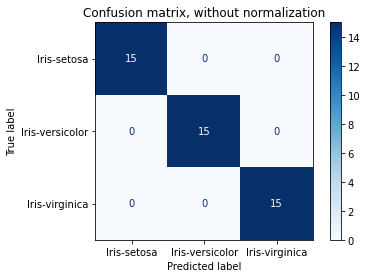

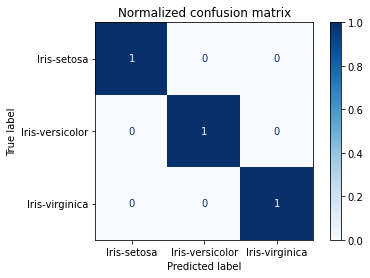

In [ ]:
from sklearn.metrics import plot_confusion_matrix

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(m, X_test, y_test,
                                 display_labels=iris['class'].unique(),
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

plt.show()

In [ ]:
y_pred = m.predict(X_test)

The classification report is a good practice to see the precision, recall and F1 score of the model's performance based on the target.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



#### Save the model for later use

We might want to save our model for later use.

For example, we could embed our model into a webservice or mobile application. So we use the method `dump()` from the joblib package to save the model to a file.

In [ ]:
dump(m, 'iris-classifier.dmp')

['iris-classifier.dmp']

In [ ]:
ic = load('iris-classifier.dmp')
confusion_matrix(y_test, ic.predict(X_test))

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  0, 15]])

### 4.2 Decision tree classifier


### TODO 4

Write code to build a decision tree classifier, using the `DecisionTreeClassifier` class provided by scikit-learn.

Similarly to 4.1 above, your code should build, train, and test the classifier, compute its accuracy, display the confusion matrices and classification report, save the model to a file for later use, load it from file and confirm that it's working.


0.9555555555555556


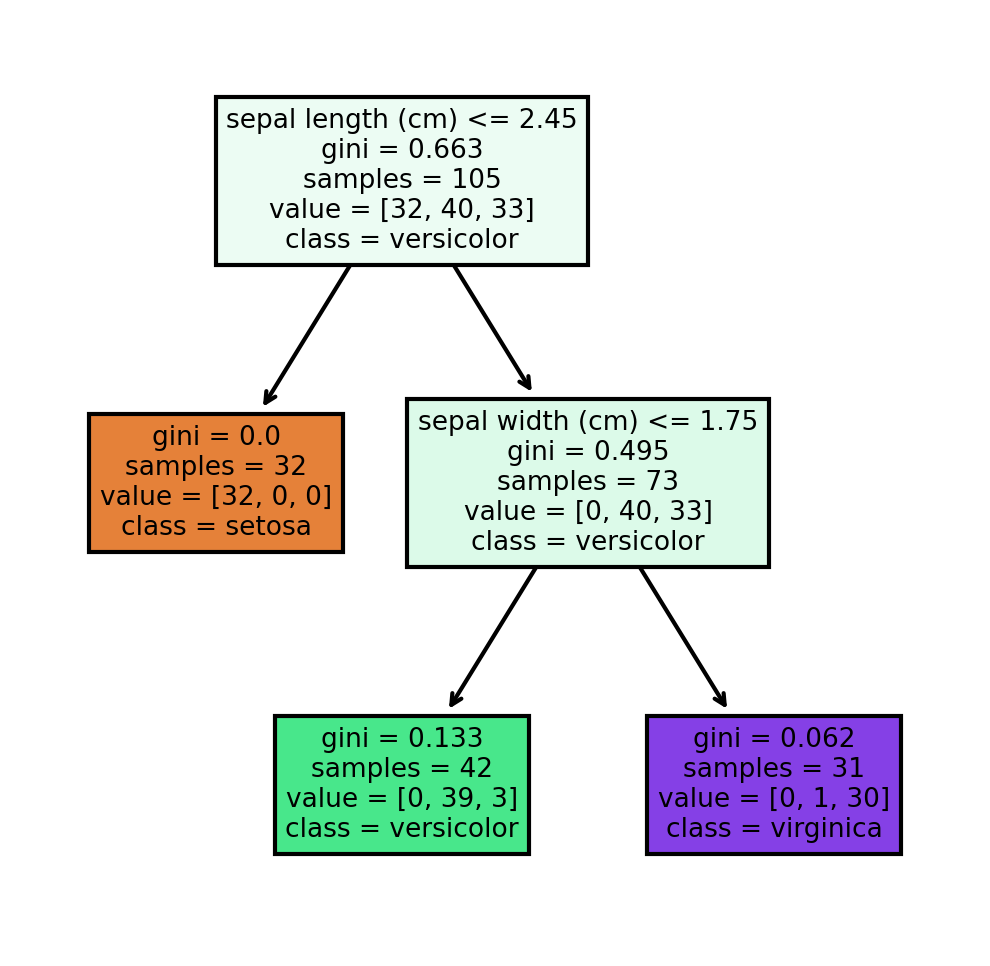

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data[:, 2:]
y = iris.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

t_clf = DecisionTreeClassifier(max_depth=2)
t_clf.fit(X_train, y_train)
y_pred = t_clf.predict(X_test)

fn = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
cn = ['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4), dpi=300)

plot_tree(t_clf, feature_names=fn, class_names=cn, filled=True)
fig.savefig('tree.png')

print(accuracy_score(y_pred, y_test))

### 4.3 Support Vector Classification

### TODO 5

Write a code to build a SVC (support vector classifier) using SVC provided by scikit-learn. Similar to 4.1 above, your code should build, train and test classifier, compute its accuracy, display confusion matrics and classification report. Save the model to a file for later use, load it from the file and confirm that it's working.

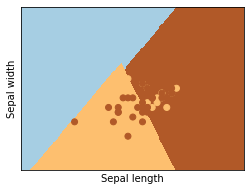

In [ ]:
import numpy as np
import pylab as pl
from sklearn import svm, datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2] # we only take the first two features.
Y = iris.target

h = .02 # step size in the mesh

clf=svm.SVC(C=20, kernel='linear')

# we create an instance of SVM Classifier and fit the data.
clf.fit(X, Y)

# Plot the decision boundary. For that, we will asign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
pl.figure(1, figsize=(4, 3))
pl.set_cmap(pl.cm.Paired)
pl.pcolormesh(xx, yy, Z)

# Plot also the training points
pl.scatter(X[:,0],X[:,1],c=Y )
pl.xlabel('Sepal length')
pl.ylabel('Sepal width')

pl.xlim(xx.min(), xx.max())
pl.ylim(yy.min(), yy.max())
pl.xticks(())
pl.yticks(())

pl.show()

### 4.4 Gaussian Naive Bayes Classifier

### TODO 6

Write a code to build a [Gaussian Naive Bayes Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) provided by scikit-learn. Similar to 4.1 above, your code should build, train and test classifier, compute its accuracy, display confusion matrics and classification report. Save the model to a file for later use, load it from the file and confirm that it's working.

Features :  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


<Figure size 432x288 with 0 Axes>

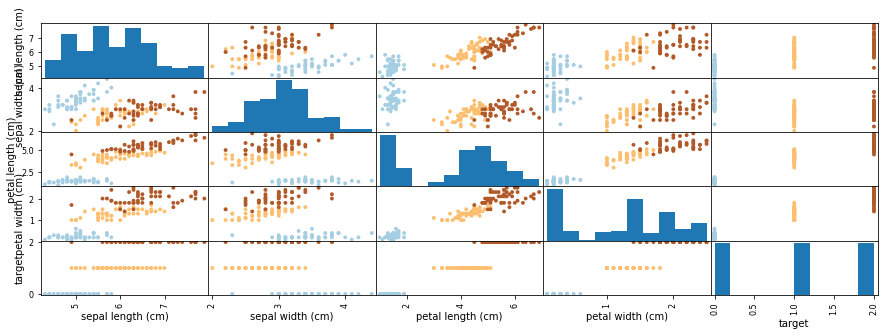

In [ ]:
# ENTER THE CODE HERE
from sklearn import datasets

iris = datasets.load_iris()            #loading dataset

X = iris.data[:,]                    #input
y = iris.target                      #target

print("Features : ", iris['feature_names'])

iris_dataframe = pd.DataFrame(data=np.c_[iris['data'],iris['target']],
                             columns=iris['feature_names']+['target'])

plt.figure()
grr = pd.plotting.scatter_matrix(iris_dataframe, c=iris['target'],
                                  figsize=(15,5),
                                  s=60,alpha=8)
plt.show()

# Features :  ['sepal length (cm)', 'sepal width (cm)', 'petal      # length (cm)', 'petal width (cm)']


### CONCLUSION

### LESSONS LEARNED

Write in your own words which algorithm performed better and what are lessons learnt during this assignment


I had worked with the Iris Dataset in the pass for a python class, so it was really refreshing going back to it with a little more experience. I remembered using and how to pair plot for the Iris dataset. but the other points I had to do my own research. All the algorithms use were effective and I reviewed multiple source before executing them. All my soucrse are listed at the top of the page. I really enjoyed learning and watching all the algorithms and functions,howerer the one I enjoyed the most was how the Gaussian Naive Bayes Classifier works. This was my first time learning about it, so I took my time to see how Gaussian Naive Bayes Classifier works.